<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [91]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [2]:
df=pd.read_csv('Heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
5,0,43,2.000000,0,0.000000,0.000000,0,1,0,228.000000,180.000000,110.000000,30.300000,77.000000,99.000000,0
6,0,63,1.000000,0,0.000000,0.000000,0,0,0,205.000000,138.000000,71.000000,33.110000,60.000000,85.000000,1
7,0,45,2.000000,1,20.000000,0.000000,0,0,0,313.000000,100.000000,71.000000,21.680000,79.000000,78.000000,0
8,1,52,1.000000,0,0.000000,0.000000,0,1,0,260.000000,141.500000,89.000000,26.360000,76.000000,79.000000,0
9,1,43,1.000000,1,30.000000,0.000000,0,1,0,225.000000,162.000000,107.000000,23.610000,93.000000,88.000000,0


In [3]:
df.shape

(4240, 16)

In [4]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df['male']=df['male'].astype(object)
df['education']=df['education'].astype(object)
df['currentSmoker']=df['currentSmoker'].astype(object)
df['BPMeds']=df['BPMeds'].astype(object)
df['prevalentHyp']=df['prevalentHyp'].astype(object)
df['prevalentStroke']=df['prevalentStroke'].astype(object)
df['diabetes']=df['diabetes'].astype(object)

In [7]:
df.isnull().sum()*100/len(df)

male              0.000000
age               0.000000
education         2.476415
currentSmoker     0.000000
cigsPerDay        0.683962
BPMeds            1.250000
prevalentStroke   0.000000
prevalentHyp      0.000000
diabetes          0.000000
totChol           1.179245
sysBP             0.000000
diaBP             0.000000
BMI               0.448113
heartRate         0.023585
glucose           9.150943
CVD               0.000000
dtype: float64

In [8]:
df=df.dropna(axis=0,subset=['education','cigsPerDay','BPMeds','totChol','BMI','heartRate'])

In [9]:
df.glucose.skew()

6.2819106259853585

In [10]:
df['glucose']=df['glucose'].fillna(df.glucose.median())

In [11]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [12]:
df_num=df.select_dtypes(np.number).drop('CVD',axis=1)
df_cat=df.select_dtypes(object)

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the proportion of classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
print('class 0:',(df.CVD.value_counts()[0])*100/len(df.CVD))
print('class 1:',(df.CVD.value_counts()[1])*100/len(df.CVD))

class 0: 85.08398094760592
class 1: 14.916019052394084


<AxesSubplot:xlabel='CVD', ylabel='count'>

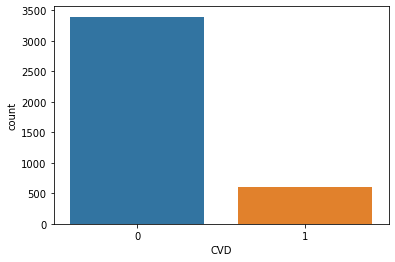

In [14]:
sns.countplot(x=df.CVD)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
sc= StandardScaler()
df_num= pd.DataFrame(sc.fit_transform(df_num), columns=df_num.columns)
col_num= df_num.columns

df_cat= pd.get_dummies(df_cat, drop_first=True)
col_cat= df_cat.columns

df_num.reset_index(drop=True, inplace=True)
df_cat.reset_index(drop=True, inplace=True)

df_num.columns= col_num
df_cat.columns= col_cat

df_tot= pd.concat([df_num, df_cat], axis=1)


In [16]:
df_tot.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'male_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1'],
      dtype='object')

In [17]:
X=df_tot[['sysBP','diaBP','BPMeds_1.0']]
y=df.CVD.reset_index(drop=True)

In [18]:
X=sm.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
logit_1=sm.Logit(y_train,x_train).fit()
logit_1.summary()

Optimization terminated successfully.
         Current function value: 0.392410
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3187
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                 0.05239
Time:                        13:47:58   Log-Likelihood:                -1252.2
converged:                       True   LL-Null:                       -1321.4
Covariance Type:            nonrobust   LLR p-value:                 8.096e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8792      0.055    -34.344      0.000      -1.986      -1.772
sysBP          0.6171      0.074      8.283      0.000       0.471       0.763
diaBP         -0.1112      0.076     -1.465      0.143      -0.260       0.038
BPMeds_1.0     0.1689      0.245      0.690      0.490      -0.311       0.649
==============================================================================
"""

In [ ]:
#sys--bp

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
X=df_cat
X=sm.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
logit2=sm.Logit(y_train,x_train).fit()
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.387490
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3181
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                 0.06428
Time:                        13:48:02   Log-Likelihood:                -1236.5
converged:                       True   LL-Null:                       -1321.4
Covariance Type:            nonrobust   LLR p-value:                 6.569e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3206      0.117    -19.801      0.000      -2.550      -2.091
male_1                0.4555      0.108      4.211      0.000       0.243       0.668
education_2.0        -0.4541      0.129     -3.532      0.000      -0.706      -0.202
education_3.0        -0.2575      0.156     -1.650      0.099      -0.564       0.048
education_4.0        -0.1665      0.169     -0.987      0.323      -0.497       0.164
currentSmoker_1       0.1341      0.108      1.245      0.213      -0.077       0.345
BPMeds_1.0            0.3507      0.241      1.456      0.145      -0.122       0.823
prevalentStroke_1     1.2023      0.517      2.328      0.020       0.190       2.215
prevalentHyp_1        0.9796      0.108      9.036      0.000       0.767       1.192
diabetes_1            1.1043      0.245      4.506      0.000       0.624       1.585
=====================================================================================
"""

In [21]:
logit2.params

const               -2.320586
male_1               0.455505
education_2.0       -0.454148
education_3.0       -0.257537
education_4.0       -0.166545
currentSmoker_1      0.134129
BPMeds_1.0           0.350718
prevalentStroke_1    1.202307
prevalentHyp_1       0.979607
diabetes_1           1.104256
dtype: float64

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
X=df_tot
X=sm.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
logit3=sm.Logit(y_train,x_train).fit()
logit3.summary()

Optimization terminated successfully.
         Current function value: 0.362807
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3173
Method:                           MLE   Df Model:                           17
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                  0.1239
Time:                        13:50:26   Log-Likelihood:                -1157.7
converged:                       True   LL-Null:                       -1321.4
Covariance Type:            nonrobust   LLR p-value:                 2.429e-59
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3432      0.148    -15.885      0.000      -2.632      -2.054
age                   0.5665      0.064      8.812      0.000       0.441       0.693
cigsPerDay            0.2190      0.083      2.648      0.008       0.057       0.381
totChol               0.1185      0.054      2.209      0.027       0.013       0.224
sysBP                 0.2632      0.092      2.853      0.004       0.082       0.444
diaBP                -0.0002      0.085     -0.003      0.998      -0.166       0.165
BMI                  -0.0057      0.057     -0.100      0.920      -0.118       0.106
heartRate            -0.0328      0.055     -0.596      0.551      -0.141       0.075
glucose               0.2287      0.059      3.889      0.000       0.113       0.344
male_1                0.4643      0.120      3.870      0.000       0.229       0.699
education_2.0        -0.1998      0.136     -1.471      0.141      -0.466       0.066
education_3.0        -0.0853      0.164     -0.518      0.604      -0.408       0.237
education_4.0         0.1369      0.176      0.778      0.437      -0.208       0.482
currentSmoker_1       0.0495      0.171      0.289      0.773      -0.286       0.385
BPMeds_1.0            0.0710      0.256      0.277      0.782      -0.431       0.573
prevalentStroke_1     1.2442      0.548      2.271      0.023       0.170       2.318
prevalentHyp_1        0.3304      0.152      2.176      0.030       0.033       0.628
diabetes_1           -0.0861      0.363     -0.237      0.812      -0.797       0.625
=====================================================================================
"""

In [ ]:
#r2 -.1239

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
logit3.pvalues[logit3.pvalues<0.5]

const               0.000000
age                 0.000000
cigsPerDay          0.008101
totChol             0.027172
sysBP               0.004337
glucose             0.000101
male_1              0.000109
education_2.0       0.141294
education_4.0       0.436743
prevalentStroke_1   0.023157
prevalentHyp_1      0.029572
dtype: float64

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>6. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
ypred_prob=logit3.predict(x_test)
ypred=[0 if x< 5 else 1 for x in ypred_prob]

In [29]:
cm=confusion_matrix(y_test,ypred)
cm

array([[666,   0],
       [132,   0]], dtype=int64)

In [31]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [32]:
accuracy_score=(TN+TP)/(TN+TP+FN+FP)
print('The accuracy score is :',accuracy_score)

The accuracy score is : 0.8345864661654135


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
ypred=[0 if x< 0.18 else 1 for x in ypred_prob]
cohen_kappa_score(y_test,ypred)

0.23923873790758365

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

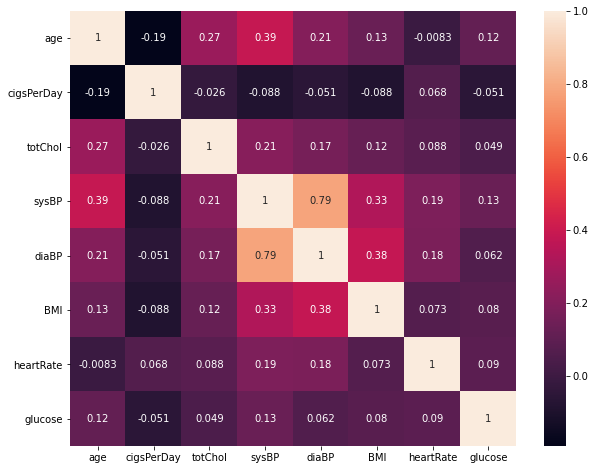

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True)

In [35]:
df_new=df_tot.drop('diaBP',axis=1)

In [36]:
x=df_new
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the data obtained from Q8 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
from sklearn.feature_selection import RFE

logreg=LogisticRegression()
rfe=RFE(estimator=logreg,n_features_to_select=5)
rfe=rfe.fit(x_train,y_train)

In [58]:
feat=pd.Series(data=rfe.ranking_,index=x_train.columns)
feat[feat==1].index

Index(['age', 'sysBP', 'male_1', 'prevalentStroke_1', 'prevalentHyp_1'], dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a model using the features obtained in question 9. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                         <li>Roc_Auc</li>
                         <li> Precision </li>
                        <li> Recall</li>  
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:

X1=df_new[['age','sysBP','male_1','prevalentStroke_1','prevalentHyp_1']]
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y,test_size=.2,random_state=20)

In [85]:
logreg1=LogisticRegression()
logreg1=logreg1.fit(x_train1,y_train1)

In [86]:
ypred_rfe=log_reg1.predict(x_test1)

In [87]:
accuracy_score(y_test1,ypred_rfe)

TypeError: 'numpy.float64' object is not callable

In [88]:
print(classification_report(y_test1,y_pred_rfe))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       674
           1       0.12      0.01      0.02       124

    accuracy                           0.84       798
   macro avg       0.48      0.50      0.46       798
weighted avg       0.73      0.84      0.77       798



In [ ]:
# the f1 score 77%
#Precision value is 78%
#Recall value 83%

In [72]:
prob=log_reg1.predict_proba(x_test1)
fpr,tpr,th=roc_curve(y_test1,prob[:,1])

Text(0, 0.5, 'tpr')

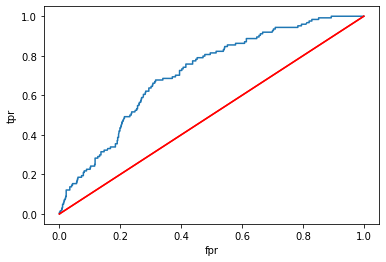

In [73]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test1,prob[:,1])

0.7127644299798985

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Calculate the cross entropy for the model built in question 8.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [94]:
from sklearn.metrics import log_loss

In [95]:
log_loss(y_test1,y_pred_rfe)

5.626624722456643

<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
X=df_new
y=df.CVD.reset_index(drop=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [99]:
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)

In [100]:
ypred_2=lr.predict_proba(x_test)

In [101]:
fpr,tpr,th=roc_curve(y_test,ypred_2[:,1])
youden= pd.DataFrame({'TPR': tpr,
                      'FPR': fpr,
                      'thres':th})
youden['YI']= youden.TPR- youden.FPR
youden= youden.sort_values('YI',ascending=False).reset_index(drop=True)
youden.head()

,TPR,FPR,thres,YI
0,0.621212,0.282282,0.162574,0.338930
1,0.583333,0.246246,0.176987,0.337087
2,0.651515,0.315315,0.152287,0.336200
3,0.606061,0.270270,0.167516,0.335790
4,0.613636,0.279279,0.164759,0.334357


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
ypred=lr.predict_proba(x_test)

In [103]:
fn=3
fp=1.3
th=np.arange(0.1,1,0.1)

total_cost=[]

for t in th:
    pred= [0 if p<t else 1 for p in ypred[:,1]]
    cm= confusion_matrix(y_test,pred)
    fp= cm[0,1]
    fn= cm[1,0]
    cost= fp*1.3+fn*3
    total_cost.append(cost)

    
df= pd.DataFrame({'threshold':th,'tot cost':total_cost})
df[df['tot cost']==df['tot cost'].min()]

,threshold,tot cost
3,0.400000,361.500000
